Dataset: https://github.com/laxmimerit/Covid-19-Preprocessed-Dataset

In [6]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import folium 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import math
import random
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

#color pallette
cnf = '#393e46'
dth = '#ff2e63'
rec = '#21bf73'
act = '#fe9801'

import plotly as py
py.offline.init_notebook_mode(connected=True)

In [7]:
df = pd.read_csv('covid_19_data_cleaned.csv', parse_dates=['Date'])

country_daywise = pd.read_csv('country_daywise.csv', parse_dates=['Date'])
countrywise = pd.read_csv('countrywise.csv')
daywise = pd.read_csv('daywise.csv', parse_dates=['Date'])

In [8]:
df['Province/State']=df['Province/State'].fillna('')

In [9]:
confirmed=df.groupby('Date').sum()['Confirmed'].reset_index()
recovered=df.groupby('Date').sum()['Recovered'].reset_index()
death=df.groupby('Date').sum()['Deaths'].reset_index()

In [10]:
df.isnull().sum()

Date              0
Province/State    0
Country           0
Lat               0
Long              0
Confirmed         0
Recovered         0
Deaths            0
Active            0
dtype: int64

In [11]:
India=df.query('Country=="India"')
India

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
79674,2020-01-22,,India,20.593684,78.96288,0,0,0,0
79675,2020-01-23,,India,20.593684,78.96288,0,0,0,0
79676,2020-01-24,,India,20.593684,78.96288,0,0,0,0
79677,2020-01-25,,India,20.593684,78.96288,0,0,0,0
79678,2020-01-26,,India,20.593684,78.96288,0,0,0,0
...,...,...,...,...,...,...,...,...,...
80211,2021-07-12,,India,20.593684,78.96288,30907282,30063720,410784,432778
80212,2021-07-13,,India,20.593684,78.96288,30946147,30104659,411406,430082
80213,2021-07-14,,India,20.593684,78.96288,30987880,30143850,411989,432041
80214,2021-07-15,,India,20.593684,78.96288,31026829,30183876,412531,430422


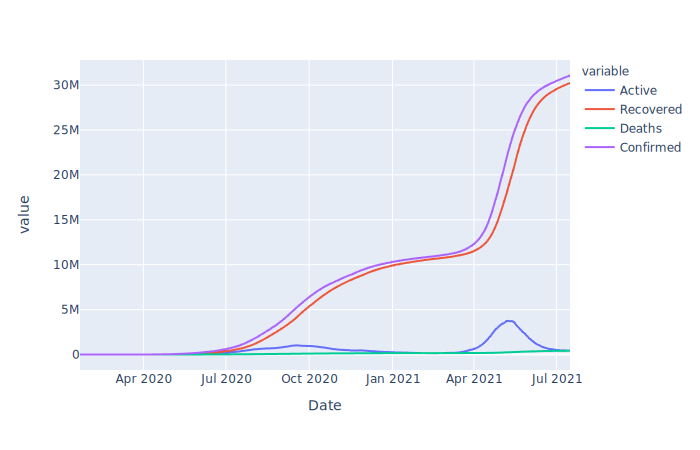

In [12]:
confirmedIn=India.groupby('Date').sum()['Confirmed'].reset_index()
recoveredIn=India.groupby('Date').sum()['Recovered'].reset_index()
deathIn=India.groupby('Date').sum()['Deaths'].reset_index()
ActiveIn=India.groupby('Date').sum()['Active'].reset_index()
fig=px.line(India,x='Date', y=['Active','Recovered','Deaths','Confirmed'])
fig.show("svg")

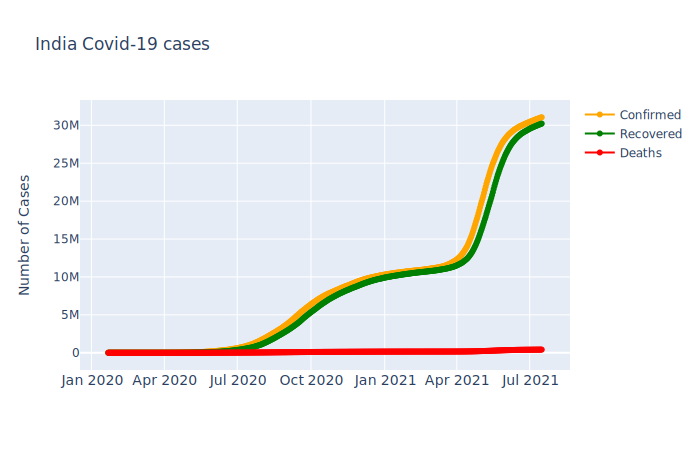

In [13]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=confirmedIn['Date'],y=confirmedIn['Confirmed'], mode='lines+markers',name='Confirmed',line=dict(color='Orange',width=2)))
fig.add_trace(go.Scatter(x=recoveredIn['Date'],y=recoveredIn['Recovered'], mode='lines+markers',name='Recovered',line=dict(color='Green',width=2)))
fig.add_trace(go.Scatter(x=deathIn['Date'],y=deathIn['Deaths'], mode='lines+markers',name='Deaths',line=dict(color='Red',width=2)))
fig.update_layout(title='India Covid-19 cases',xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show("svg")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154470 entries, 0 to 154469
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            154470 non-null  datetime64[ns]
 1   Province/State  154470 non-null  object        
 2   Country         154470 non-null  object        
 3   Lat             154470 non-null  float64       
 4   Long            154470 non-null  float64       
 5   Confirmed       154470 non-null  int64         
 6   Recovered       154470 non-null  int64         
 7   Deaths          154470 non-null  int64         
 8   Active          154470 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 10.6+ MB


In [15]:
df['Date']=df['Date'].astype(str)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154470 entries, 0 to 154469
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            154470 non-null  object 
 1   Province/State  154470 non-null  object 
 2   Country         154470 non-null  object 
 3   Lat             154470 non-null  float64
 4   Long            154470 non-null  float64
 5   Confirmed       154470 non-null  int64  
 6   Recovered       154470 non-null  int64  
 7   Deaths          154470 non-null  int64  
 8   Active          154470 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 10.6+ MB


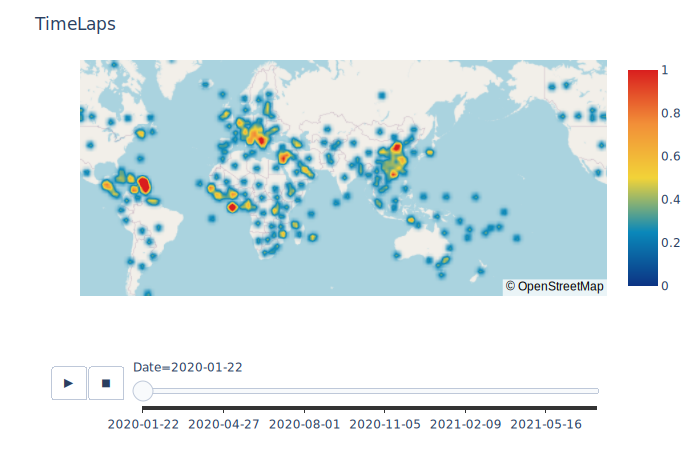

In [17]:
fig=px.density_mapbox(df, lat='Lat', lon='Long',hover_name='Country',hover_data=['Confirmed','Recovered','Deaths'],animation_frame='Date' , color_continuous_scale='Portland',radius=7,zoom=0,height=700)
fig.update_layout(title='TimeLaps')
fig.update_layout(mapbox_style='open-street-map',mapbox_center_lon=78)
fig.show("svg")

In [18]:
#Total Cases on Ships

df['Date']=pd.to_datetime(df['Date'])
ship_rows = df['Province/State'].str.contains('Grand Princess') | df['Province/State'].str.contains('Diamond Princess') | df['Country'].str.contains('Grand Princess') | df['Country'].str.contains('Diamond Princess') | df['Country'].str.contains('MS Zaandam')
ship = df[ship_rows]

In [19]:
df=df[~ship_rows]

In [20]:
ship_latest = ship[ship['Date']==max(ship['Date'])]
ship_latest

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
22763,2021-07-16,Diamond Princess,Canada,0.0,0.0,0,0,1,-1
23305,2021-07-16,Grand Princess,Canada,0.0,0.0,13,0,0,13
57451,2021-07-16,,Diamond Princess,0.0,0.0,712,699,13,0
94307,2021-07-16,,MS Zaandam,0.0,0.0,9,7,2,0


In [21]:
ship_latest.style.background_gradient(cmap = 'Pastel1_r')

,Date,Province/State,Country,Lat,Long,Confirmed,Recovered,Deaths,Active
22763,2021-07-16 00:00:00,Diamond Princess,Canada,0.000000,0.000000,0,0,1,-1
23305,2021-07-16 00:00:00,Grand Princess,Canada,0.000000,0.000000,13,0,0,13
57451,2021-07-16 00:00:00,,Diamond Princess,0.000000,0.000000,712,699,13,0
94307,2021-07-16 00:00:00,,MS Zaandam,0.000000,0.000000,9,7,2,0


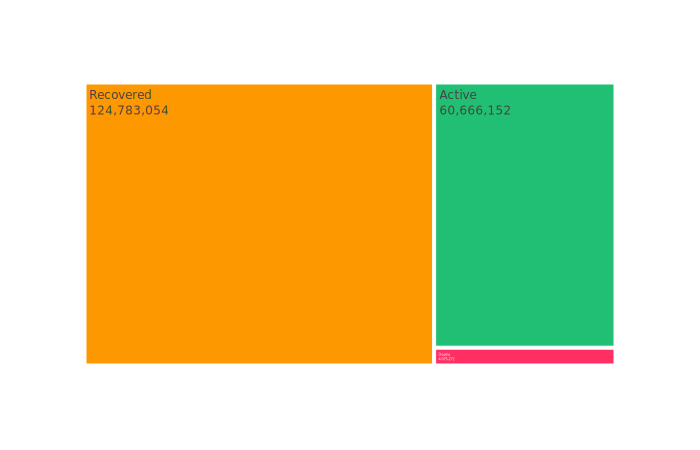

In [22]:
#Cases Over the Time with Area Plot

temp=df.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
temp = temp[temp['Date']==max(temp['Date'])]

tm = temp.melt(id_vars ='Date', value_vars =['Active','Deaths','Recovered'])
fig = px.treemap(tm,path=['variable'],values='value',height=300,width=1000,color_discrete_sequence=[act,rec,dth])
fig.data[0].textinfo = 'label+text+value'
fig.show("svg")

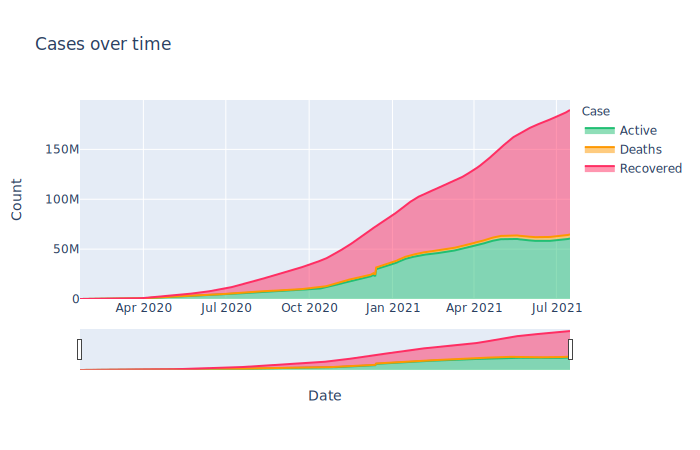

In [23]:
temp=df.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
temp = temp.melt(id_vars ='Date', value_vars =['Active','Deaths','Recovered'],var_name='Case',value_name='Count')

fig =px.area(temp, x='Date',y='Count',color='Case',height=600,title='Cases over time',color_discrete_sequence=[rec,act,dth])
fig.update_layout(xaxis_rangeslider_visible=True)
fig.show("svg")

In [29]:
#FOLIUM MAPS


temp = df[df['Date']==max(df['Date'])]

m= folium.Map(location=[0,0],tiles='cartodbpositron',min_zoom=1,max_zoom=4,zoom_start=1)

for i in range(0,len(temp)):
    folium.Circle(location=[temp.iloc[i]['Lat'], temp.iloc[i]['Long']],color='crimson',fill = 'crimson',
                  tooltip  = '<li><bold> Country:'+str(temp.iloc[i]['Country'])+
                           '<li><bold> Province/State:'+str(temp.iloc[i]['Province/State'])+
                           '<li><bold> Confirmed:'+str(temp.iloc[i]['Confirmed'])+
                           '<li><bold> Deaths:'+str(temp.iloc[i]['Deaths']),radius=int(temp.iloc[i]['Confirmed'])**0.5).add_to(m)

                  
m
